<a href="https://colab.research.google.com/github/AbhayMudgal/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from google.colab import files
from keras.preprocessing import image

mnist = K.datasets.fashion_mnist

In [11]:
class myCallback(K.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc')>0.9):
      print("90% accuracy reached")
      self.model.stop_training = True


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [30]:
y_test.shape

(10000,)

In [12]:
#print(x_train.shape, x_test.shape) 
x_train_CNN = x_train
x_test_CNN = x_test

x_train_CNN = x_train_CNN.reshape(60000, 28, 28, 1)
x_test_CNN = x_test_CNN.reshape(10000, 28, 28, 1)

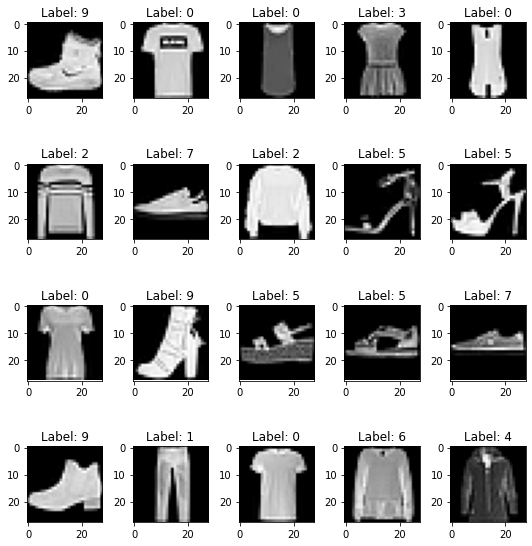

In [22]:
num_row = 4
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [13]:
neural_network = K.models.Sequential([
  K.layers.Flatten(input_shape = (28, 28)),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dropout(0.2),
  K.layers.Dense(10, activation = 'softmax')   
])

print(neural_network.summary())

CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Dropout(0.1),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dropout(0.1),
  K.layers.Dense(64, activation = 'relu'),
  K.layers.Dropout(0.1),
  K.layers.Dense(10, activation = 'softmax')                       
])

print(CNN.summary())

CNN2 = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Dropout(0.1),
  K.layers.Conv2D(16, (3, 3), activation = 'relu'),
  K.layers.MaxPool2D(2, 2),
  K.layers.Dropout(0.1),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dropout(0.1),
  K.layers.Dense(64, activation = 'relu'),
  K.layers.Dropout(0.1),
  K.layers.Dense(10, activation = 'softmax')                       
])

print(CNN2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_____________________

In [14]:
neural_network.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
callbacks = [K.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001), 
             K.callbacks.EarlyStopping(monitor='accuracy', patience=2)]

Epoch 1/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5049 - accuracy: 0.8202 - val_loss: 0.4184 - val_accuracy: 0.8472
Epoch 2/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3896 - accuracy: 0.8583 - val_loss: 0.3510 - val_accuracy: 0.8692
Epoch 3/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3524 - accuracy: 0.8703 - val_loss: 0.3605 - val_accuracy: 0.8665
Epoch 4/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8769 - val_loss: 0.3350 - val_accuracy: 0.8787
Epoch 5/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3131 - accuracy: 0.8845 - val_loss: 0.3462 - val_accuracy: 0.8785
Epoch 6/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3019 - accuracy: 0.8888 - val_loss: 0.3284 - val_accuracy: 0.8837
Epoch 7/40
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2881 - accuracy: 0.8935 - val_loss: 0.3246 - val_accuracy:

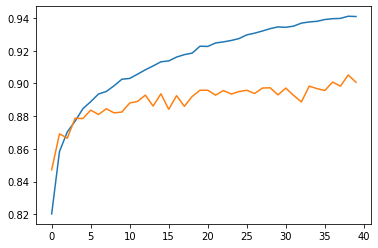

In [16]:
history_NN = neural_network.fit(x_train, y_train, epochs = 40, validation_split = 0.1, callbacks = callbacks, shuffle = True)
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

Epoch 1/40
1688/1688 [==============================] - 34s 3ms/step - loss: 0.4474 - accuracy: 0.8401 - val_loss: 0.3392 - val_accuracy: 0.8760
Epoch 2/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.8901 - val_loss: 0.2964 - val_accuracy: 0.8923
Epoch 3/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2600 - accuracy: 0.9050 - val_loss: 0.2546 - val_accuracy: 0.9090
Epoch 4/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2280 - accuracy: 0.9149 - val_loss: 0.2529 - val_accuracy: 0.9063
Epoch 5/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9245 - val_loss: 0.2458 - val_accuracy: 0.9112
Epoch 6/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1821 - accuracy: 0.9315 - val_loss: 0.2485 - val_accuracy: 0.9158
Epoch 7/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1661 - accuracy: 0.9368 - val_loss: 0.2662 - val_accuracy

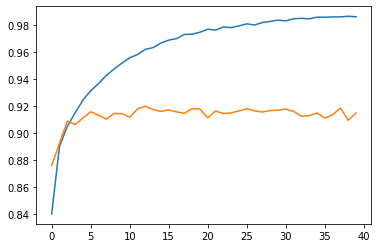

In [17]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 40, validation_split = 0.1, callbacks = callbacks, shuffle = True)
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1755 - accuracy: 0.9330 - val_loss: 0.2713 - val_accuracy: 0.9055
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1735 - accuracy: 0.9324 - val_loss: 0.2653 - val_accuracy: 0.9048
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1703 - accuracy: 0.9348 - val_loss: 0.2610 - val_accuracy: 0.9075
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1670 - accuracy: 0.9362 - val_loss: 0.2569 - val_accuracy: 0.9077
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1653 - accuracy: 0.9362 - val_loss: 0.2618 - val_accuracy: 0.9110
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1619 - accuracy: 0.9381 - val_loss: 0.2835 - val_accuracy: 0.9032
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1568 - accuracy: 0.9406 - val_loss: 0.2741 - val_accuracy:

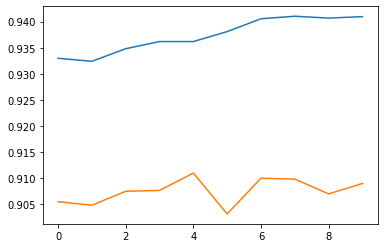

In [23]:
history_CNN2 = CNN2.fit(x_train_CNN, y_train, epochs = 40, validation_split = 0.1, callbacks = callbacks, shuffle = True)
plt.plot(history_CNN2.history['accuracy'], label = 'train')
plt.plot(history_CNN2.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

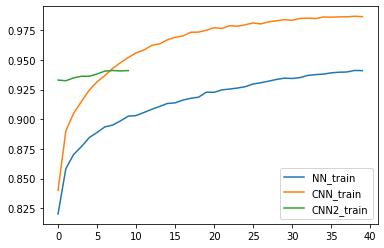

In [24]:
plt.plot(history_NN.history['accuracy'], label = 'NN_train')
plt.plot(history_CNN.history['accuracy'], label = 'CNN_train')
plt.plot(history_CNN2.history['accuracy'], label = 'CNN2_train')
plt.legend() 
plt.show()

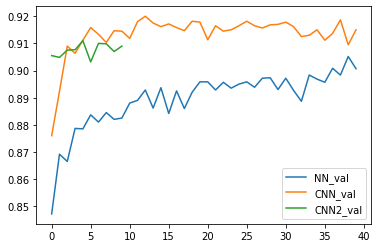

In [25]:
plt.plot(history_NN.history['val_accuracy'], label = 'NN_val')
plt.plot(history_CNN.history['val_accuracy'], label = 'CNN_val')
plt.plot(history_CNN2.history['val_accuracy'], label = 'CNN2_val')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.9041


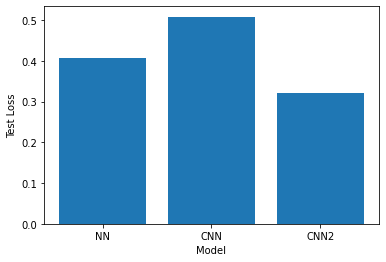

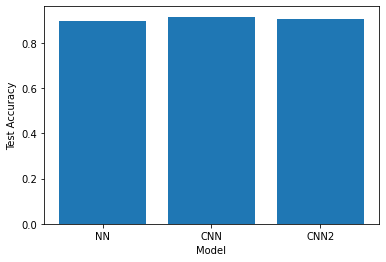

In [32]:
nn_loss, nn_acc = neural_network.evaluate(x_test, y_test)
CNN_loss, CNN_acc = CNN.evaluate(x_test_CNN, y_test)
CNN2_loss, CNN2_acc = CNN2.evaluate(x_test_CNN, y_test)

models = ['NN', "CNN", 'CNN2']
accuracy = []
loss = []

loss.append(nn_loss)
loss.append(CNN_loss)
loss.append(CNN2_loss)

plt.bar(models, loss)
plt.xlabel("Model")
plt.ylabel("Test Loss")
plt.show()


accuracy.append(nn_acc)
accuracy.append(CNN_acc)
accuracy.append(CNN2_acc)

plt.bar(models, accuracy)
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.show()

